# Projeto Final - Economia

*   **Escola**: SouCode Academy
*   **Curso**: Bootcamp Analista de Dados - Martech - AD2
*   **Professores**: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro
*   **Equipe**: Ângelo Máximo, Bianka Cristina, Bruno Nunes, Paulo Paulino, Samira Cavalcanti e Vagner Pereira








## Base 01 - Análise do Impacto do COVID-19 na Economia Global

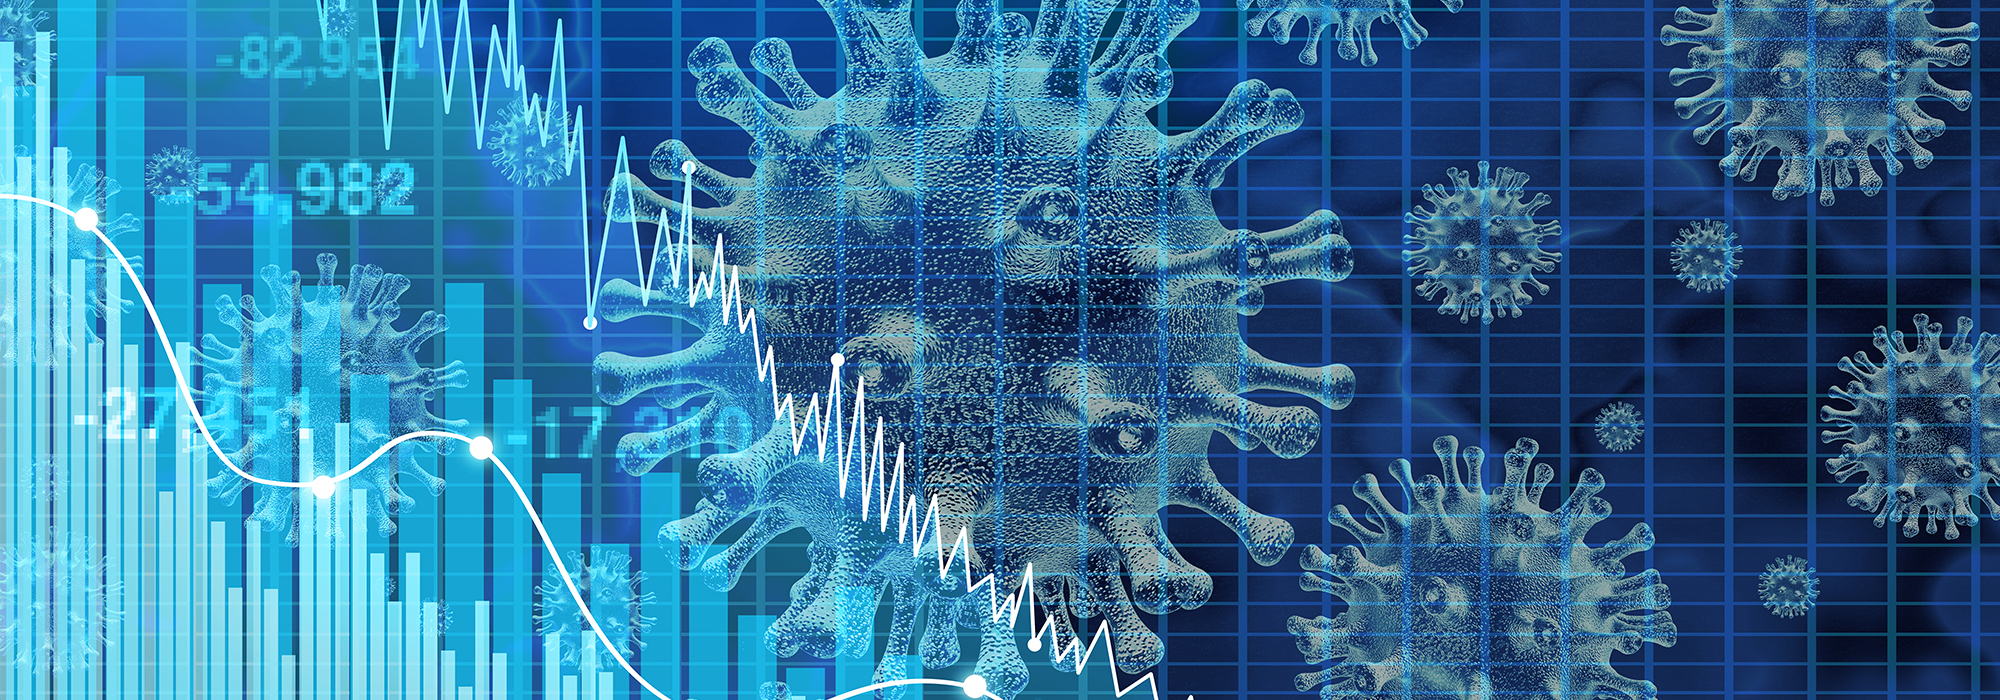

## Introdução:

A crise gerou um impacto drástico na pobreza e na desigualdade em âmbito mundial.
 Pela primeira vez em uma geração, a pobreza global registrou um aumento significativo, e as disparidades de renda entre as populações desfavorecidas contribuíram para um acentuado aumento da desigualdade tanto dentro como entre os países.

O surto de Covid-19 impôs várias restrições que tiveram amplos impactos na economia global. Praticamente todos os países foram afetados negativamente pelo aumento de casos de Covid-19.

## O Que Será Analisado?

Nesta análise exploratória de dados, vamos investigar o impacto do COVID-19 na economia global utilizando três conjuntos de dados retirados do Kaggle, de atributos-chave, como País, Data, Índice de Desenvolvimento Humano, Total de Casos, Total de Mortes, População, Índice de Restrição (refletindo o impacto das medidas restritivas adotadas) e PIB. Com base nas informações disponíveis, buscaremos compreender a relação entre essas variáveis e o aumento da pobreza e desigualdade globais, examinando como as perdas de renda afetaram especialmente as populações desfavorecidas. Além disso, exploraremos como as restrições impostas em resposta ao surto de Covid-19 afetaram a economia dos países, analisando como o número de casos pode ter influenciado negativamente o PIB das nações. Utilizando as bibliotecas pandas, numpy, pandera e matplotlib, nossos insights visam fornecer uma compreensão mais profunda do impacto da pandemia na economia global.

## Dicionário

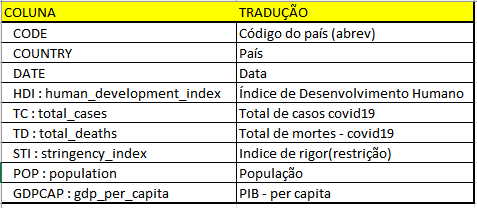



## Instalação de Pacotes e Bibilotecas

In [ ]:
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
# Abertura de bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from google.cloud import storage

In [ ]:
# desconsiderando possíveis avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade máxima de colunas
pd.set_option('display.max_columns',100)


## Extração

In [ ]:
# Configuração da chave de acesso de segurança - acesso ao projeto
serviceAccount = "/content/max-digital-63376-77a4986290c9.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - acesso ao Bucket
client = storage.Client()
bucket = client.get_bucket('g6-data')
bucket.blob('transformed_data.csv')
bucket.blob('raw_data.csv')
path1 = 'gs://g6-data/Bruto/economia_global/transformed_data.csv'
path2 = 'gs://g6-data/Bruto/economia_global/raw_data.csv'
path3 = 'gs://g6-data/Bruto/Índice global de fome por país 2022.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df1 = pd.read_csv(path1,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback1 = df1.copy()

In [ ]:
df2 = pd.read_csv(path2,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback2 = df2.copy()

In [ ]:
df3 = pd.read_csv(path3,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback3 = df3.copy()

## Visualização dos datasets



*    O conjunto de dados que analisamos contém dois aqruivos.
 Um contém os dados brutos(raw data) e o outro contém os dados transformados(transformed data).

*    Porém, para esta tarefa, precisamos utlizar os dois conjuntos, pois contêm informações igualmente importantes em colunas distintas.






In [ ]:
# Visualização do dataframe começando pelo início
df1.head()

,ï»¿CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [ ]:
# Visualização do dataframe começando pelo início
df2.head()

,ï»¿iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [ ]:
# Visualização do dataframe começando pelo final
df1.tail()

,ï»¿CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491


In [ ]:
# Visualização do dataframe começando pelo final
df2.tail()

,ï»¿iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048296,5.442417711,4.34185547,16.514381,7.549490737
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528148,5.442417711,4.34185547,16.514381,7.549490737
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999495876,5.442417711,4.34185547,16.514381,7.549490737
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853147,5.442417711,4.34185547,16.514381,7.549490737
50417,ZWE,Zimbabwe,2020-10-19,8147.0,231.0,76.85,14862927,1899.775,0.535,9.00540504,5.442417711,4.34185547,16.514381,7.549490737


## Limpeza dos dados

In [ ]:
# Tamanho do dataframe 01
df1.shape


(50418, 9)

In [ ]:
# Tamanho do dataframe 02
df2.shape

(50418, 14)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ï»¿CODE  50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿iso_code              50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [ ]:
# Verificando dados nulos, ausente etc 1
df1.isna().sum()

ï»¿CODE       0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In [ ]:
#Substituindo os valores ausentes por 0 no próprio dataframe
df1.fillna(0, inplace=True)

In [ ]:
df1.shape

(50418, 9)

In [ ]:
df1.isna().sum()

ï»¿CODE    0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [ ]:
# identificar o volume de dados e tipagem do Dataframe
print("Entradas:\t {}".format(df1.shape[0]))
print("Variáveis:\t {}\n".format(df1.shape[1]))

display(df1.dtypes)

Entradas:	 50418
Variáveis:	 9



ï»¿CODE     object
COUNTRY     object
DATE        object
HDI        float64
TC         float64
TD         float64
STI        float64
POP        float64
GDPCAP     float64
dtype: object

In [ ]:
# Transformando o atributo Date para DateTime
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ï»¿CODE  50418 non-null  object        
 1   COUNTRY  50418 non-null  object        
 2   DATE     50418 non-null  datetime64[ns]
 3   HDI      50418 non-null  float64       
 4   TC       50418 non-null  float64       
 5   TD       50418 non-null  float64       
 6   STI      50418 non-null  float64       
 7   POP      50418 non-null  float64       
 8   GDPCAP   50418 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.5+ MB


In [ ]:
df1.head()

,ï»¿CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [ ]:
# Renomeando as colunas
df1.rename(columns={"ï»¿CODE": "codigo_pais", "COUNTRY": "pais", "DATE": "data"}, inplace=True)

In [ ]:
df1.head()

,codigo_pais,pais,data,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


## Carregamento


In [ ]:
# Google Cloud
df1.to_csv('gs://g6-data/Tratado/transformed_data.csv', index=False) # salva no bucket

## Normalização dos Dados


*   Após obtermos uma visão inicial de ambos os conjuntos de dados, identificamos a necessidade de combinar as informações de ambos para criar um novo conjunto de dados consolidado.

*  Antes de prosseguir com a criação do novo conjunto de dados, é importante analisar a distribuição de amostras de cada país no conjunto de dados e verificar quantas ocorrências de cada país temos. Isso permitirá entender melhor a representatividade de cada país nos dados e garantir a integridade da análise.



In [ ]:
df1['pais'].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: pais, Length: 210, dtype: int64

Portanto, não temos um número igual de amostras de cada país no conjunto de dados. Vamos dar uma olhada no valor da moda:

In [ ]:
df1["pais"].value_counts().mode()

0    294
Name: pais, dtype: int64



*   Assim constatamos que a quantidade de amostras para cada país no conjunto de dados não é igual.





*   Vamos criar um novo conjunto de dados combinando as colunas relevantes de ambos os conjuntos de dados.



Esse código realiza uma série de cálculos agregados com base nos dados presentes em dois DataFrames (df1 e df2) para criar um novo DataFrame (agregados_df1) que contém informações como o HDI, total de casos e mortes por país, índice de rigor e população. Cada lista (hdi, tc, td, sti e populacao) armazena os valores calculados para cada país, que são posteriormente utilizados para criar o DataFrame final.

In [ ]:
# Agregando os datasets

codigo = df1["codigo_pais"].unique().tolist()
paises = df1["pais"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
populacao = df1["POP"].unique().tolist()

for i in paises:
    hdi.append((df1.loc[df1["pais"] == i, "HDI"]).sum()/294)
    tc.append((df2.loc[df2["location"] == i, "total_cases"]).sum())
    td.append((df2.loc[df2["location"] == i, "total_deaths"]).sum())
    sti.append((df1.loc[df1["pais"] == i, "STI"]).sum()/294)
    populacao.append((df2.loc[df2["location"] == i, "population"]).sum()/294)

agregados_df1 = pd.DataFrame(list(zip(codigo, paises, hdi, tc, td, sti, populacao)),
                               columns = ["Codigo_Pais", "Pais", "HDI",
                                          "Total Casos", "Total Mortes",
                                          "Indice_Rigor", "Populacao"])
print(agregados_df1.head())

  Codigo_Pais         Pais       HDI  Total Casos  Total Mortes  Indice_Rigor  \
0         AFG  Afghanistan  0.498000    5126433.0      165875.0      3.049673   
1         ALB      Albania  0.600765    1071951.0       31056.0      3.005624   
2         DZA      Algeria  0.754000    4893999.0      206429.0      3.195168   
3         AND      Andorra  0.659551     223576.0        9850.0      2.677654   
4         AGO       Angola  0.418952     304005.0       11820.0      2.965560   

   Populacao  
0  17.477233  
1  14.872537  
2  17.596309  
3  11.254996  
4  17.307957  


In [ ]:
df_agregados = agregados_df1.sort_values(by=["Total Casos"], ascending=False)
print(df_agregados)

    Codigo_Pais             Pais       HDI  Total Casos  Total Mortes  \
200         USA    United States  0.924000  746014098.0    26477574.0   
27          BRA           Brazil  0.759000  425704517.0    14340567.0   
90          IND            India  0.640000  407771615.0     7247327.0   
157         RUS           Russia  0.816000  132888951.0     2131571.0   
150         PER             Peru  0.599490   74882695.0     3020038.0   
..          ...              ...       ...          ...           ...   
204         VAT          Vatican  0.000000       2415.0           0.0   
130         MSR       Montserrat  0.000000       2383.0         177.0   
5           AIA         Anguilla  0.000000        614.0           0.0   
173         SLB  Solomon Islands  0.007429         11.0           0.0   
87          HKG        Hong Kong  0.161847          0.0           0.0   

     Indice_Rigor  Populacao  
200      3.350949  19.617637  
27       3.136028  19.174732  
90       3.610552  21.045353  

In [ ]:
# Google Cloud
df_agregados.to_csv('gs://g6-data/Tratado/df_agregados.csv', index=False) # salva no bucket

In [ ]:
dfbackup04 = df_agregados



*  Como temos muito países no dataset, vamos selecionar uma subamostra deste conjunto de dados. Criaremos uma com 10 países com o maior número de casos de covid.



In [ ]:
top_10_paises = df_agregados.head(10).sort_values(by='Total Casos', ascending=False)

In [ ]:
print(top_10_paises)

    Codigo_Pais            Pais       HDI  Total Casos  Total Mortes  \
200         USA   United States  0.924000  746014098.0    26477574.0   
27          BRA          Brazil  0.759000  425704517.0    14340567.0   
90          IND           India  0.640000  407771615.0     7247327.0   
157         RUS          Russia  0.816000  132888951.0     2131571.0   
150         PER            Peru  0.599490   74882695.0     3020038.0   
125         MEX          Mexico  0.774000   74347548.0     7295850.0   
178         ESP           Spain  0.887969   73717676.0     5510624.0   
175         ZAF    South Africa  0.608653   63027659.0     1357682.0   
42          COL        Colombia  0.581847   60543682.0     1936134.0   
199         GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Indice_Rigor  Populacao  
200      3.350949  19.617637  
27       3.136028  19.174732  
90       3.610552  21.045353  
157      3.380088  18.798668  
150      3.430126  17.311165  
125      3.019289  18

In [ ]:
# Resolução gráfica dos 10 países com maior número de casos
fig = px.choropleth(
    top_10_paises,
    locations = 'Codigo_Pais',
    locationmode='ISO-3',
    color='Total Casos',
    hover_name='Pais',
    title='Os 10 países com o maior número de casos da Covid-19',
    height=600
)

fig.show()

Correlação de Variáveis

*  A matriz de correlação é uma ferramenta estatística utilizada para compreender as relações entre variáveis. Ela é especialmente útil quando se lida com um conjunto de dados contendo várias variáveis, pois permite identificar padrões e associações entre elas. A matriz de correlação fornece informações sobre o grau e a direção da relação linear entre pares de variáveis.

*   r = 0,9 a 1 (positivo ou negativo): correlação muito forte;
    r = 0,7 a 09 (positivo ou negativo): correlação forte;
    r = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
    r = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
    r = 0 a 0,3 (positivo ou negativo): não possui correlação.



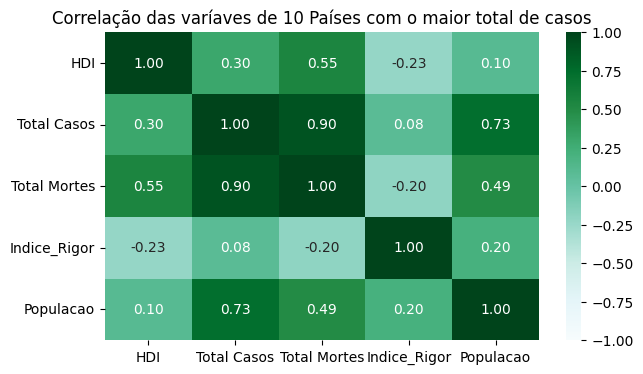

In [ ]:
columns_10_paises = ['HDI', 'Total Casos', 'Total Mortes', 'Indice_Rigor', 'Populacao']
corr_top_10_paises = top_10_paises[columns_10_paises].corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_top_10_paises, annot=True, cmap='BuGn', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlação das varíaves de 10 Países com o maior total de casos')
plt.show()

In [ ]:
#Gráfico de barras relacionando países com o maior número de casos
cores_personalizadas = ['#33C9FF']
figure = px.bar(top_10_paises, y='Total Casos', x='Pais',
            title="Paises com o Maior Número de Casos de Covid",
                color_discrete_sequence = cores_personalizadas)
figure.show()

In [ ]:
##Gráfico de barras relacionando países com o maior número de mortes
figure = px.bar(top_10_paises, y='Total Mortes', x='Pais',
            title="Países com Mais Mortes",
                color_discrete_sequence = cores_personalizadas)
figure.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_paises.head(10)["Pais"],
    y=top_10_paises["Total Casos"],
    name='Total de Casos',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["Total Mortes"],
    name='Total de Mortes',
    marker_color='blueviolet'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="Total de Casos X Total de Mortes")
fig.show()



*   Uma outra coluna importante neste conjunto de dados é o índice de rigidez (stringency index). Esse índice é uma medida composta de indicadores de resposta, que incluem o fechamento de escolas, o fechamento de locais de trabalho e as restrições de viagens. Ele mostra o quão rigorosamente os países estão implementando essas medidas para controlar a propagação da Covid-19.



In [ ]:
fig = px.bar(top_10_paises, x='Pais', y='Total Casos',
             hover_data=['Populacao', 'Total Mortes'],
             color='Indice_Rigor', height=400,
             title= "Indice de Rigor - Restrição Durante Covid",
             color_continuous_scale='darkmint'
)
fig.show()



*   Neste caso, podemos perceber que a Índia tem apresentado um bom desempenho no índice de rigidez durante o surto de Covid-19.





*   Vamos prosseguir com a análise dos impactos da Covid-19 na economia. Neste cenário, o PIB per capita é o fator primordial para analisar as desacelerações econômicas causadas pelo surto de Covid-19.
*   Agora, vamos examinar o PIB per capita antes do surto de Covid-19 entre os países com o maior número de casos de Covid-19:





*  A seguir, incluiremos duas colunas neste conjunto de dados, uma para o PIB Per Capita antes da Covid e outra para o PIB Per Capita durante a Covid-19.

Nota: Dados coletados manualmente em : https://pt.tradingeconomics.com/country-list/gdp-per-capita



In [ ]:
top_10_paises["GDP_antcovid"] = [65279.53, 8897.49, 2100.75,
                            11497.65, 7027.61, 9946.03,
                            29564.74, 6001.40, 6424.98, 42354.41]
top_10_paises["GDP_durcovid"] = [63543.58, 6796.84, 1900.71,
                            10126.72, 6126.87, 8346.70,
                            27057.16, 5090.72, 5332.77, 40284.64]
print(top_10_paises)

    Codigo_Pais            Pais       HDI  Total Casos  Total Mortes  \
200         USA   United States  0.924000  746014098.0    26477574.0   
27          BRA          Brazil  0.759000  425704517.0    14340567.0   
90          IND           India  0.640000  407771615.0     7247327.0   
157         RUS          Russia  0.816000  132888951.0     2131571.0   
150         PER            Peru  0.599490   74882695.0     3020038.0   
125         MEX          Mexico  0.774000   74347548.0     7295850.0   
178         ESP           Spain  0.887969   73717676.0     5510624.0   
175         ZAF    South Africa  0.608653   63027659.0     1357682.0   
42          COL        Colombia  0.581847   60543682.0     1936134.0   
199         GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Indice_Rigor  Populacao  GDP_antcovid  GDP_durcovid  
200      3.350949  19.617637      65279.53      63543.58  
27       3.136028  19.174732       8897.49       6796.84  
90       3.610552  21.045353  

In [ ]:
top_10_paises.to_csv('gs://g6-data/Tratado/top_10_paises.csv', index=False) # salva no bucket

In [ ]:
fig = px.bar(top_10_paises, x='Pais', y='Total Casos',
             hover_data=['Populacao', 'Total Mortes'],
             color='GDP_antcovid', height=400,
             title="GDP Per Capita Antes Covid-19",
             color_continuous_scale='Viridis'
)
fig.show()



*   Vamos analisar o PIB per capita durante o aumento dos casos de Covid-19:



In [ ]:
fig = px.bar(top_10_paises, x='Pais', y='Total Casos',
             hover_data=['Populacao', 'Total Mortes'],
             color='GDP_durcovid', height=400,
             title="GDP Per Capita Durante Covid-19",
             color_continuous_scale='Viridis'
)
fig.show()



*   Vamos realizar uma comparação entre o PIB per capita antes da Covid-19 e durante a Covid-19, a fim de avaliar o impacto da Covid-19 no PIB per capita:



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["GDP_antcovid"],
    name='GDP Per Capita Antes Covid-19',
    marker_color='Darkcyan'
))
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["GDP_durcovid"],
    name='GDP Per Capita Durante Covid-19',
    marker_color='Blueviolet'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()



*   É perceptível uma diminuição no PIB per capita em todos os países com o maior número de casos de Covid-19.


*   Outro fator econômico relevante é o Índice de Desenvolvimento Humano. Esse índice é uma medida composta que inclui a expectativa de vida, educação e indicadores per capita.

*   Vamos verificar quantos países estão alocando recursos para o desenvolvimento humano:








In [ ]:
fig = px.bar(top_10_paises, x='Pais', y='Total Casos',
             hover_data=['Populacao', 'Total Mortes'],
             color='HDI', height=400,
             title="Índice de Desenvolvimento Humano Durante a Covid-19",
             color_continuous_scale='rainbow'
)

fig.show()

## Índice Global da Fome 2022



*   O Índice Global da Fome (IGF) é uma ferramenta para medir e acompanhar de forma abrangente a fome a nível global, regional
e nacional ao longo dos últimos anos e décadas. Os resultados do IGF são calculados com base numa fórmula que combina quatro indicadores que, em conjunto, captam a natureza multidimensional da fome:
*   **Subalimentação**: percentagem da população subalimentada, refletindo uma ingestão calórica insuficiente.
*   **Atraso no crescimento infantil**: percentagem de crianças
com menos de cinco anos consideradas raquíticas (baixa
estatura para a sua idade), refletindo subnutrição crónica.
*   **Emaciação infantil**: percentagem de crianças com menos
de cinco anos de idade que são emaciadas (baixo peso
para a sua altura), refletindo a subnutrição aguda.
*   **Mortalidade infantil**: a taxa de mortalidade de crianças com menos de cinco anos de idade.


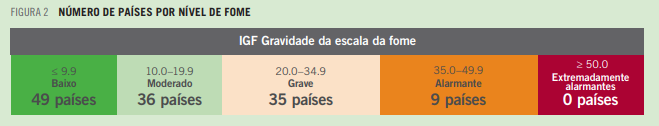






In [ ]:
# Renomeando a coluna Country
df3.rename(columns={"Country": "País"}, inplace=True)

In [ ]:
df3.tail(9)

,Rank,Country,2000,2007,2014,2022
120,117,Chad,50.7,49.0,40.7,37.2
121,118,Dem. Rep. of the Congo,48.0,43.2,38.7,37.8
122,119,Madagascar,42.5,37.2,37.3,38.7
123,120,Central African Rep.,48.8,46.8,44.6,44.0
124,121,Yemen,41.3,38.4,41.7,45.1
125,122,Burundi,NaN,NaN,NaN,45.5
126,123,Somalia,NaN,NaN,NaN,45.5
127,124,South Sudan,NaN,NaN,NaN,45.5
128,125,Syrian,NaN,NaN,NaN,45.5


In [ ]:
df3.head(10)

,Rank,País,2000,2007,2014,2022
0,1,Belarus,<5,<5,<5,<5
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5
2,3,Chile,<5,<5,<5,<5
3,4,China,13.3,7.8,<5,<5
4,5,Croatia,<5,<5,<5,<5
5,6,Estonia,<5,<5,<5,<5
6,7,Hungary,5.5,<5,<5,<5
7,8,Kuwait,<5,<5,<5,<5
8,9,Latvia,5.6,<5,<5,<5
9,10,Lithuania,5.4,<5,<5,<5


In [ ]:
df3_mais_afetados = df3.tail(9)
print(df3_mais_afetados)

     Rank                    País  2000  2007  2014  2022
120   117                    Chad  50.7  49.0  40.7  37.2
121   118  Dem. Rep. of the Congo  48.0  43.2  38.7  37.8
122   119              Madagascar  42.5  37.2  37.3  38.7
123   120    Central African Rep.  48.8  46.8  44.6  44.0
124   121                   Yemen  41.3  38.4  41.7  45.1
125   122                 Burundi   NaN   NaN   NaN  45.5
126   123                 Somalia   NaN   NaN   NaN  45.5
127   124             South Sudan   NaN   NaN   NaN  45.5
128   125                  Syrian   NaN   NaN   NaN  45.5


In [ ]:
df3_mais_afetados.to_csv('gs://g6-data/Tratado/Indice Global Paises Mais Afetados 2022.csv', index=False) # salva no bucket

A situação pode se agravar diante da atual convergência de crises globais sobrepostas - confrontos, mudanças climáticas e os impactos econômicos resultantes da pandemia de COVID-19 - todas essas forças poderosas que podem intensificar a escassez de alimentos. O conflito na Ucrânia amplificou ainda mais os valores internacionais de produtos alimentícios, combustíveis e fertilizantes, e tem a capacidade de exacerbar ainda mais a carência de alimentos em 2023 e nos anos vindouros.



## Conclusão

*   Durante o ano de 2020, os países como Estados Unidos, Brasil, Índia enfrentaram grandes desafios com o alto número de casos de Covid-19. O surto da pandemia resultou em sérias consequências econômicas para essas nações e impactou significatiavamente a economia mundial. Observamos um maior numero de casos e mortes nos Estados Unidos. Uma das principais razões para isso é o índice de rigidez(medidas de restrição) que é comparativamente baixo em relação à sua população. Também analisamos como o PIB per Capita de cada país foi afetado durante o surto da pandemia. O aumento do número de casos e mortes gerou pressão sobre os sistemas de saúde, que causou uma diminuição na produção e no consumo. Além disso, o índice de desenvolvimento humano desses países também foi prejudicado, pois a pandemia sobrecarragou os serviços de saude e educação, dificultando o acesso da população e recursos essenciais. Como resultado, os impactos econômicos e sociais desses países repercutiram em nível global, afetando outros países depedentes de suas economias. A pandemia expôs a vulnerabilidade da economia mundial e a importância da cooperação internacional para enfrentar crises dessa natureza. O resultado pós pandêmico junto a outros fatores de crises mundias aumentaram signifiticamente de forma alarmante os indices de fome de alguns países do Oriente Médio e da África.

